In [4]:
pip install pandas scikit-learn seaborn

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
titanic = sns.load_dataset('titanic')


In [15]:
titanic

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False
888,0,3,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


In [6]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)


In [7]:
X = titanic[['pclass', 'age', 'fare', 'sex_male']]
y = titanic['survived']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 80.45%
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



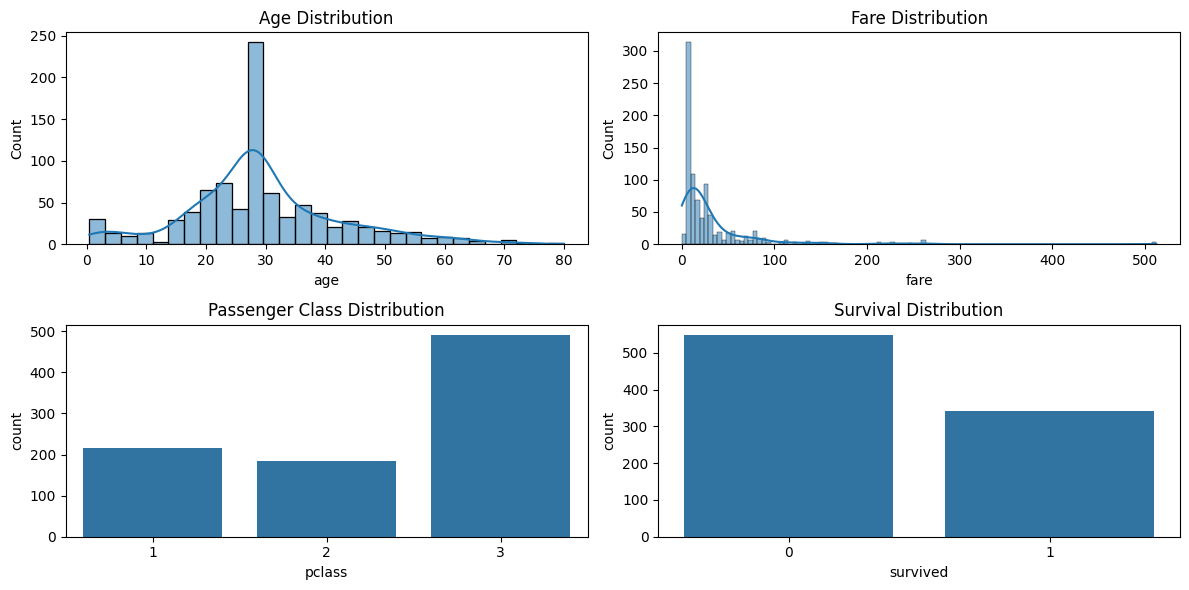

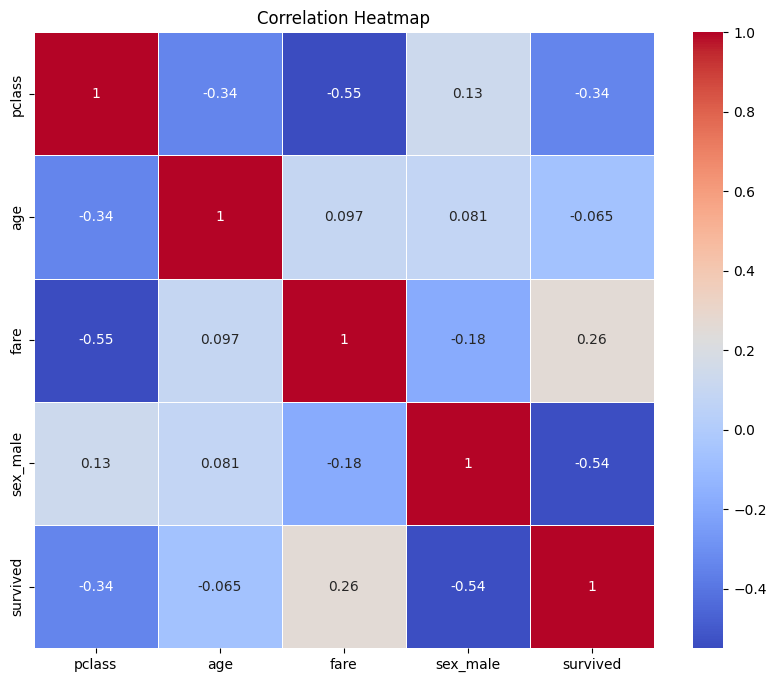

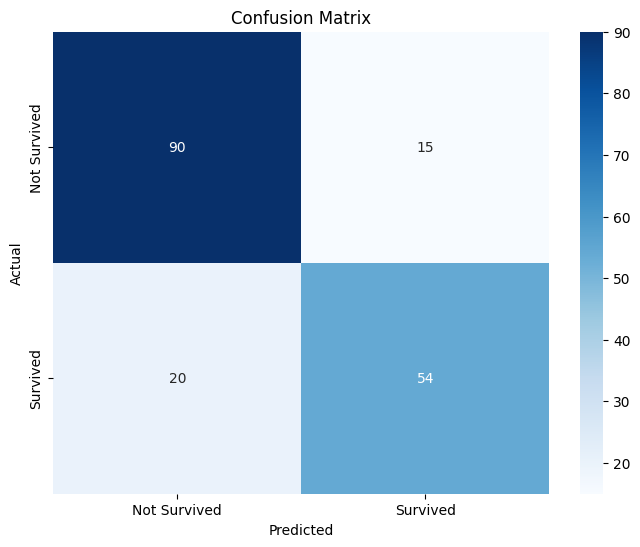

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(titanic['fare'].dropna(), kde=True)
plt.title('Fare Distribution')

plt.subplot(2, 2, 3)
sns.countplot(data=titanic, x='pclass')
plt.title('Passenger Class Distribution')

plt.subplot(2, 2, 4)
sns.countplot(data=titanic, x='survived')
plt.title('Survival Distribution')

plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = titanic[['pclass', 'age', 'fare', 'sex_male', 'survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
